In [8]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('btcusd_1-min_data.csv')

## Understand Data

In [9]:
# Display the first few rows of the dataset
print(data.head())

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [10]:
# Check the dimensions of the dataset
print('Dataset Shape:', data.shape)

Dataset Shape: (6772281, 6)


In [11]:
# Check the data types of each column
print('Data Types:', data.dtypes)

Data Types: Timestamp    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
dtype: object


In [12]:
# Summary statistics
print('Summary Statistics:')
print(data.describe())

Summary Statistics:
          Timestamp          Open          High           Low         Close  \
count  6.772280e+06  6.772281e+06  6.772281e+06  6.772281e+06  6.772281e+06   
mean   1.528666e+09  1.499611e+04  1.500249e+04  1.498952e+04  1.499612e+04   
std    1.174228e+08  2.056363e+04  2.057129e+04  2.055576e+04  2.056365e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.427007e+09  4.148600e+02  4.149700e+02  4.147000e+02  4.148500e+02   
50%    1.528602e+09  6.314280e+03  6.316920e+03  6.311310e+03  6.314300e+03   
75%    1.630197e+09  2.354000e+04  2.354900e+04  2.353100e+04  2.354000e+04   
max    1.740269e+09  1.089460e+05  1.090300e+05  1.087760e+05  1.089600e+05   

             Volume  
count  6.772281e+06  
mean   5.442645e+00  
std    2.288500e+01  
min    0.000000e+00  
25%    1.841000e-02  
50%    4.977057e-01  
75%    3.160058e+00  
max    5.853852e+03  


## Data Preprocessing

In [14]:
# Check for missing values
df = data
missing_values = df.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [17]:
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Timestamp').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

## Handling Missing Values

In [18]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())


## Feature Engineering

In [19]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()


In [20]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


## Exploratory Data Analysis

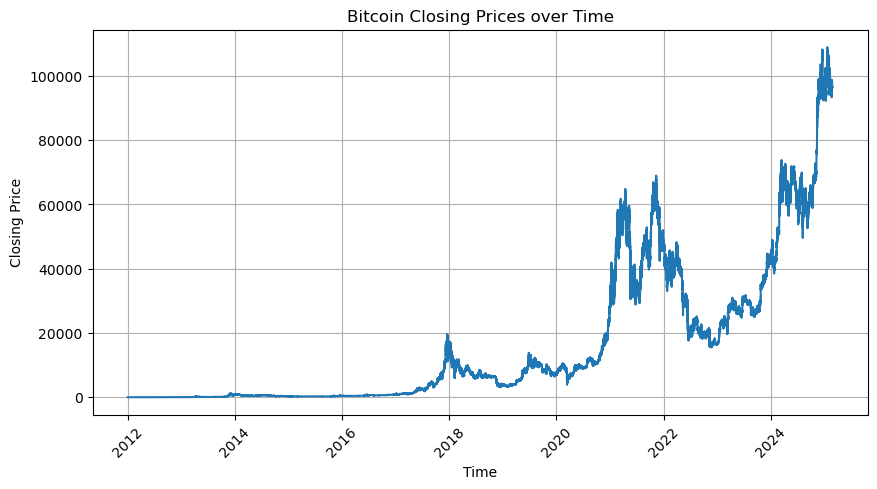

In [21]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Bitcoin_Closing_Prices.png', dpi=800)
plt.show()

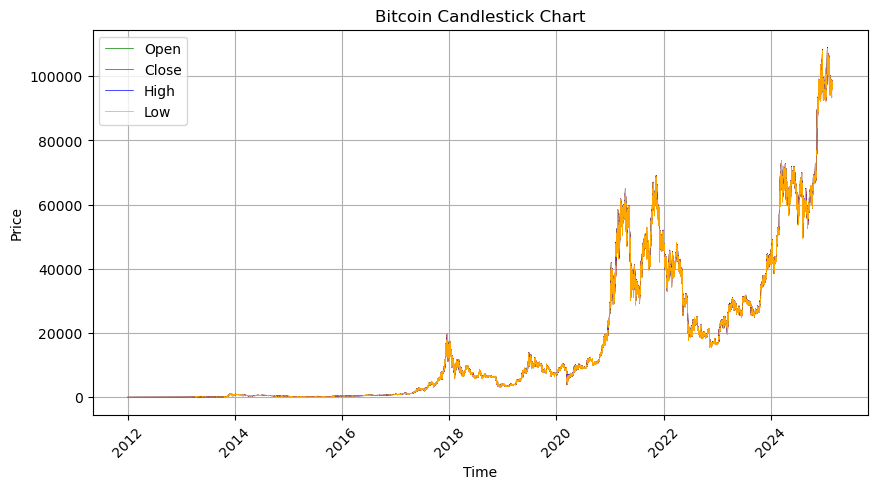

In [22]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open', linewidth=0.5)
plt.plot(df.index, df['Close'], color='red', label='Close', linewidth=0.5)
plt.plot(df.index, df['High'], color='blue', label='High', linewidth=0.5)
plt.plot(df.index, df['Low'], color='orange', label='Low', linewidth=0.5)
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('Bitcoin_Candlestick_Chart.png', dpi=800)
plt.show()

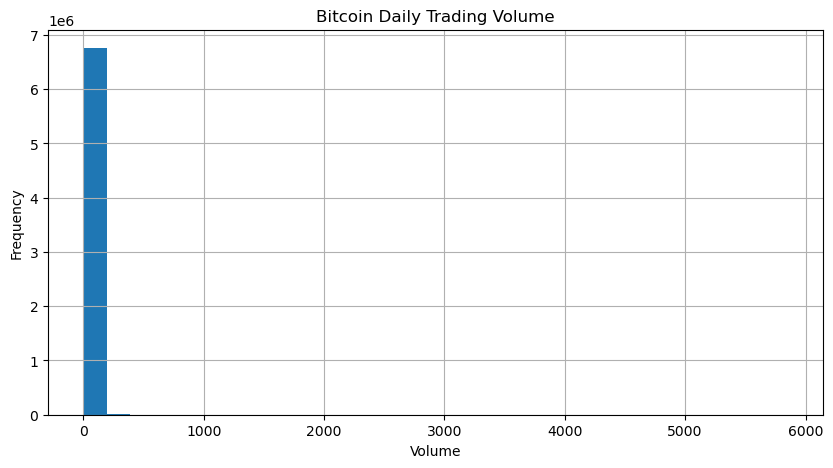

In [24]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Bitcoin_daily_trading_volume.png', dpi=800)
plt.show()

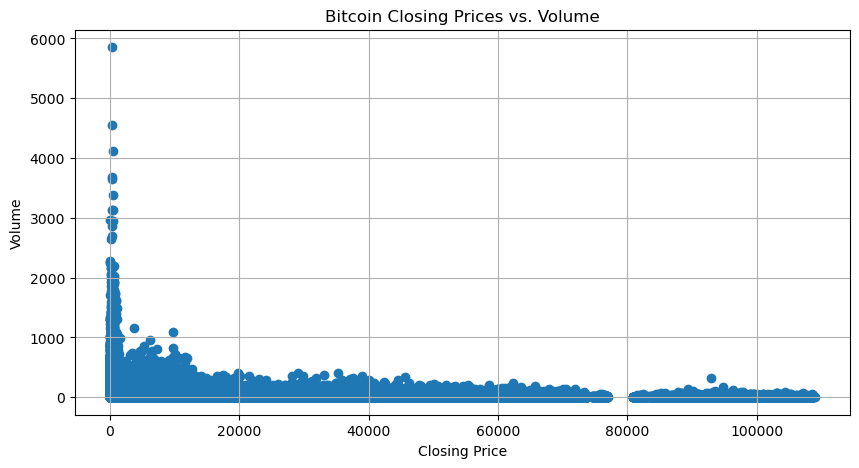

In [26]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig('Bitcoin_closing_prices_vs_volume.png', dpi=800)
plt.show()

<Figure size 1000x500 with 0 Axes>

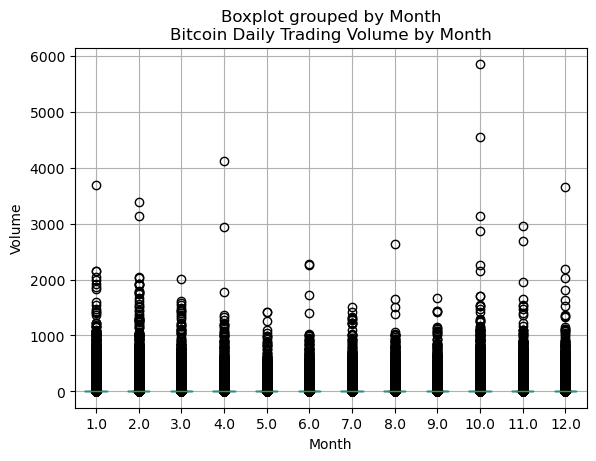

In [27]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.savefig('Bitcoin_daily_trading_volume_by_Month.png', dpi=800)
plt.show()

## Model Selection

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [29]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [30]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [31]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
# SARIMA model
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [33]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

31/31 [==============================] - 1s 972us/step


In [34]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [35]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 34406.33084155291
SARIMA RMSE: 31463.74939878466
LSTM RMSE: 51829.234826451895
Gradient Boosting Regressor RMSE: 34941.544539305345


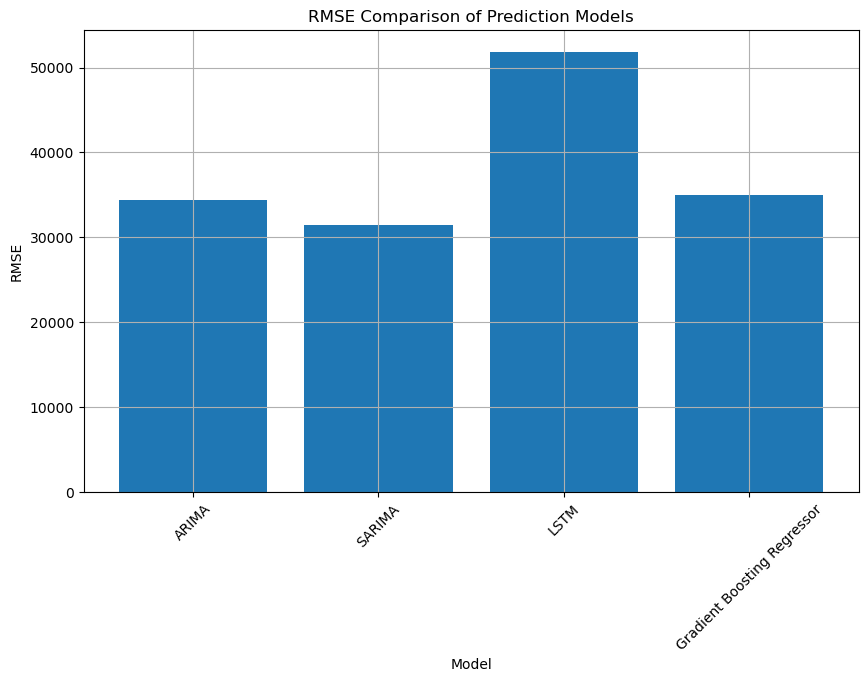

In [36]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('RMS_Comparison.png', dpi=800)

plt.show()
